# EDA on Sales of Used Ford Cars

Ford cars are resold depending of various factors such as model, mileage, etc. This datasets includes such information on used Ford cars sold during the years 1996 and 2020. 

**Attributes/Columns**

- model - model of the car
- year - year of manufacture
- price - price of the car
- transmission - type of transmission in the car (Automatic, Manual and Semi-automatic)
- mileage - mileage of the car
- fuelType - type of fuel used in the car (Petrol, Diesel, Electric, Hybrid and Others)
- mpg - miles the car run per gallon
- engineSize - size of the engine used in the car

**Data Source**
<br> https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
# Naming the DataFrame - df
# Reading the .xlsx or .csv file using pandas: pd.read_csv("<location of dataset>")
df = pd.read_csv("ford.csv")

# Displaying the first 5 rows of the DataFrame
df.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


### Number of rows and columns

In [3]:
# <name_of_DataFrame>.shape
df.shape

# output - (total number of rows, total number of columns)

(17964, 8)

###  Data Types and Missing Values

In [4]:
# <name_of_DataFrame>.info()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

**Overview:**

- Total number of observations/rows: 17964 
- Total number of attributes/columns: 8
- Total number of object (string/mixed) data type: 3 (model, transmission, fuelType)
- Total number of integer (positive/negative/zero) data type: 3 (year, price, mileage)
- Total number of float (floating point number) data type: 2 (mpg, engineSize)
- No missing data


### Descriptive Statistics
<br>Output shows the following details of all numerical attributes in the dataset: 
- **count** (number of observations) 
- **mean** (average of all values)
- **std** (standard deviation)
- **min** (minimum value among all the observations)
- **25%** (the value at 25th percentile i.e. 25% of obversations/data has values less than the mentioned value)
- **50%** (median value or said the value at 50th percentile i.e. 50% of obversations/data has values less than the mentioned value)
- **75%** (the value at 75th percentile i.e. 75% of obversations/data has values less than the mentioned value)
- **max** (maximum value among all the observations)

In [5]:
# Creating Descriptive Statistics table
# <name_of_DataFrame>.describe()### Descriptive Statistics

df.describe()

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


**Observations**
 - 50% of the data was collected between 2017 and 2020.
 - The average price of used cars is \\$12280. The lowest price is \\$495 and highest price is  \\$54995 while half of the observations show price below \\$11291. 
 - The mileage ranges from 1 to 177644, however, 75% of the observations shows mileage above 9987, with average at 23361.
 - The mpg varies from 20.8 to 201.
 - The engine size varies from 0 to 5L.

### Creating new dataframes

This is to calculate the percentage of occurances of some variables and saving it under separate dataframes.
Easier and simpler way to the analyze the data is by defining a function.

In [6]:
#data is the names the dataframes that we are going to create by the code below
#column is the name of the columns
    
def unique_val_count(data, column):
    
    # counting the values of the column
    df_count = df[column].value_counts()
    
    # creating separate dataframes of the columns
    df_count = pd.DataFrame(df_count)
    
    # renaming new coloumns to "index"
    df_count = df_count.reset_index()
     
    # renaming column name "index" to main dataframe's column name and main dataframe's column name to 'No_of_cars'
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    # finding the % of cars for each column/dataframe
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    
    return df_count

**Naming new dataframes created from four variables of the main dataframe 'ford'**

In [7]:
model_count = unique_val_count(df, 'model')

year_count = unique_val_count(df, 'year')

transmission_count = unique_val_count(df, 'transmission')

fueltype_count = unique_val_count(df, 'fuelType')

**Sorting the new 'year_count' dataframe will arrange the 'year' column in ascending order**

In [8]:
year_count = year_count.sort_values(by='year')

### Creating barplots to visualize the newly created dataframes using function

In [9]:
def barplot(data, column_x, color, rotation, yticks):
    # data will be the name of the dataframe
    # column_x is the column that willgo in x axis
    # rotation is to rotate the labels \
    # yticks will be the range/bins/class-intervals of y axis
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
  
    plt.title("Percentage of cars present for each " + column_x)
    
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    plt.xticks(rotation=rotation)
    # With rotation, it will rotate if required
    
    plt.yticks(yticks)
    # Here we are saying that yticks will be different for each dataframes

### Setting Context and Style of Graphs

In [10]:
# Here we are setting the context of the graphs visualized in this notebook. Other options are 'book', 'paper'
sns.set_context('talk')
# Setting the style i.e. the background of the barplot to 'darkgrid'
sns.set_style("darkgrid")

### Visualizing the barplots

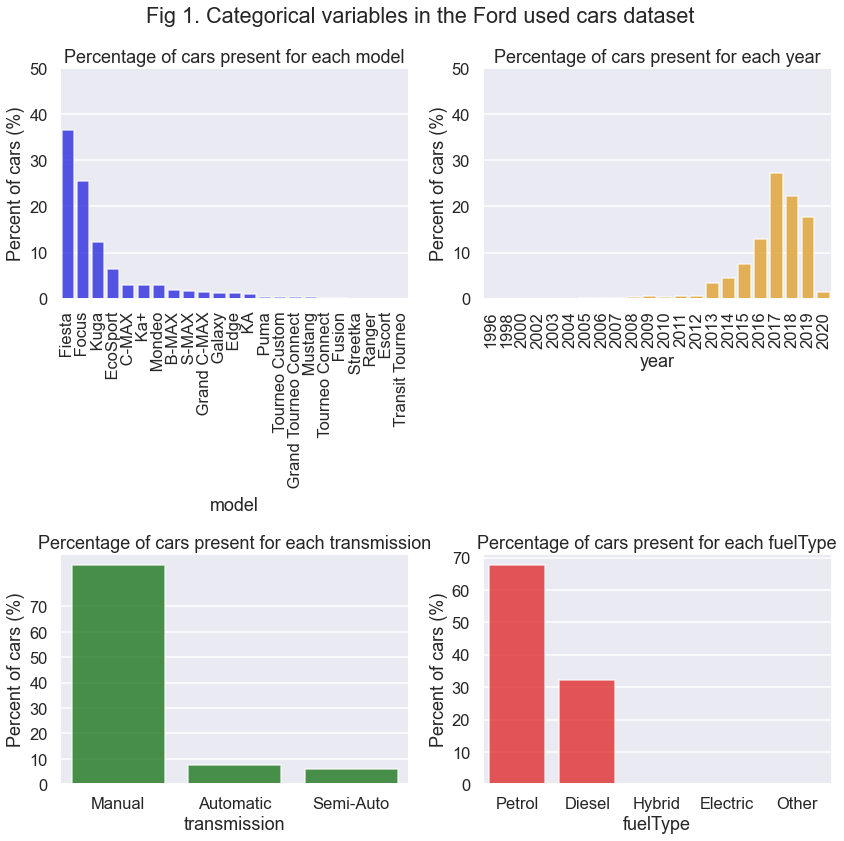

In [11]:
# Here we are setting the size of the graph. (Width, Length/Height)
plt.figure(figsize=(12,12))

# Now we'll create subplots, which means now we can combine multiple graphs and show them together.
# To position them correctly, we'll use rows and columns numbers based on the graphs placements on the figure
# (Number of rows, Number of column, position of the graph)
# In total,there will be 4 graphs in 2 rows and 2 columns.

# Subplot 'model' will be in position 1 (i.e. 1st row, 1st column)
plt.subplot(2,2,1)
# (data, column_x, color, rotation, yticks)
# data = Dataframe = model_count, 
# column_x will have the name of column that will go in x axis; it changes depending of the dataframe since each dataframe has different column name for the column that will go in x axis
# yticks = will be the range/bins/class-intervals of y axis
barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 2 (i.e. 1st row, 2nd column)
plt.subplot(2,2,2)
barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

# Subplot 'model' will be in position 3 (i.e. 2nd row, 1st column)
plt.subplot(2,2,3)
barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

# Subplot 'model' will be in position 4 (i.e. 2nd row, 2nd column)
plt.subplot(2,2,4)
barplot(fueltype_count, 'fuelType', 'red', 0, np.arange(0,71,10))


plt.suptitle("Fig 1. Categorical variables in the Ford used cars dataset")

# tight_layout helps avoid overlapping of texts among graphs
plt.tight_layout()

plt.show()

In Fig 1., first graph shows the percentage of used Ford cars based of the model.
Second graph shows the percentage of used Ford cars per year, from 1996 to 2020.
Third graph shows the three variety of transmissions (manual, automatic and semi-automatic) and the percentage of each found in Ford used cars.
Fourth graph shows the percentage of used Ford cars with fuel types distributed among petrol, diesel, hybrid, electric or others.

### Price and its relationship with Mileage using Regression Plot (Scatterplot with Trendline)

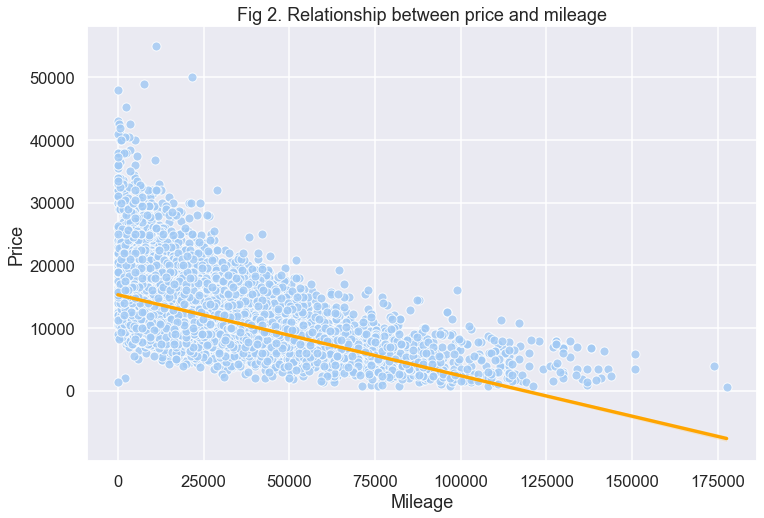

In [12]:
sns.set_palette("pastel")
# changing the color palette of the figures.

plt.figure(figsize=(12,8))

sns.regplot(x='mileage', y='price', data=df, scatter_kws={'edgecolor':'white'},  line_kws={'color':'orange'})
# To see each data point clearly, we can change the edge color by using the dictionary scatter_kws.

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Fig 2. Relationship between price and mileage")

plt.yticks(np.arange(0, 55000, 10000))

plt.show()

Fig 2 shows that the price, which is a dependent variable, changes with changes in mileage. The trend shows that as mileage increases, the price of the used Ford cars decreases. Provided that, the figure also represents that after going certain mileage, the used Ford cars hold no value.

### Visualizing Change in Price and Mileage, based on fuel types using Scatter Plot

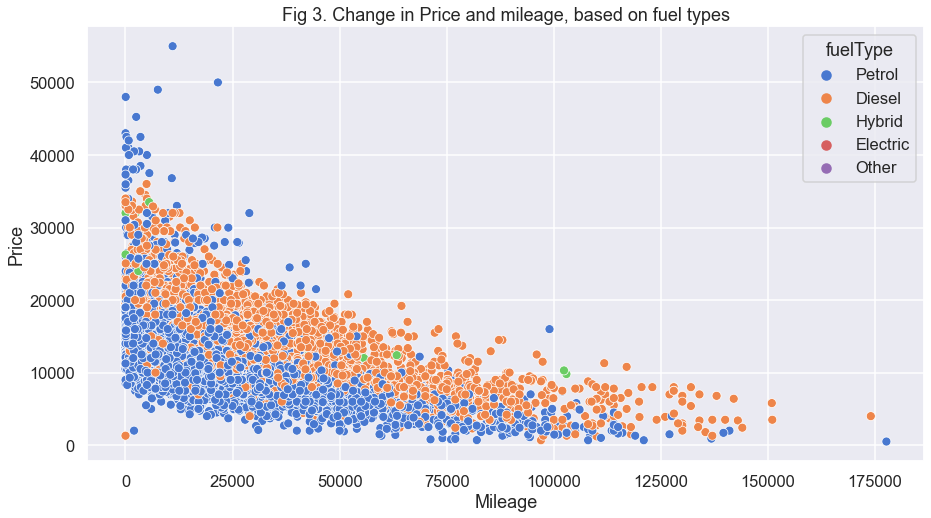

In [13]:
sns.set_palette("muted")
plt.figure(figsize=(15,8))

# hue is used to add categorical data into the analysis
sns.scatterplot(x='mileage', y='price', data=df, hue='fuelType')

plt.title("Fig 3. Change in Price and mileage, based on fuel types")
plt.xlabel("Mileage")
plt.ylabel("Price")

plt.show()

From Fig 3, it can be noted that the correlation between price and mileage (as explained in Fig 2) is consistent when fuel type of the cars are petrol and diesel. Also, the price of diesel cars shows to be higher than that of petrol cars. Hybrid, electric and other type of fuel is under-epresented in the figure due to their negligible number of observations in the dataset. 

### Visualizing Price Distribution using Distribution Plot

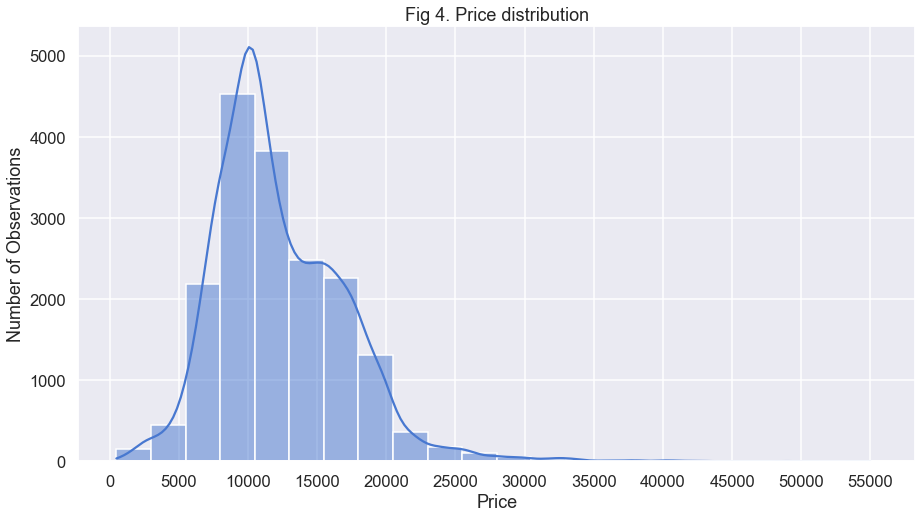

In [14]:
sns.set_palette("muted")
plt.figure(figsize=(15,8))

sns.histplot(data=df, x='price', binwidth=2500, kde=True)

plt.xticks(np.arange(0, 60000, 5000))

plt.xlabel("Price")
plt.ylabel("Number of Observations")
plt.title("Fig 4. Price distribution")

plt.show()

Fig 4. shows a unimodal distribution of price in the dataset with most of the used Ford cars sold for approximately \\$10,000. 

### Visualizing Empirical Cumulative Distribution Function (ECDF) of Price

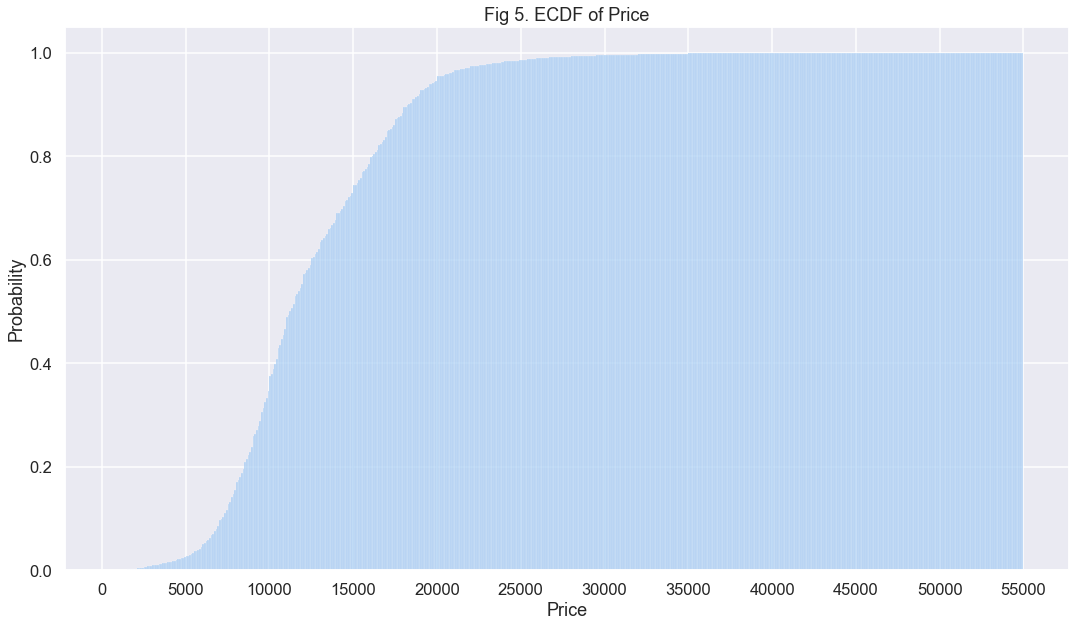

In [15]:
sns.set_palette("pastel")
plt.figure(figsize=(18,10))

sns.histplot(data=df, x='price', binwidth=100, cumulative=True, stat='probability')

plt.xticks(np.arange(0,60000,5000))
plt.xlabel("Price")
plt.ylabel("Probability")
plt.title("Fig 5. ECDF of Price")

plt.show()

Fig 5. represents the empiricial cumulative distribution of price of used Ford cars. The graph shows us the probablity of occurence of price at a given point. For example, the probablity of the price being less than or equal to \\$10,000 is approximately 0.4 and the probability of price being less than or equal to \\$15,000 is slightly more than 0.7. 

### Visualizing Statistical Summary of Price based on Transmission Types Using Box plot

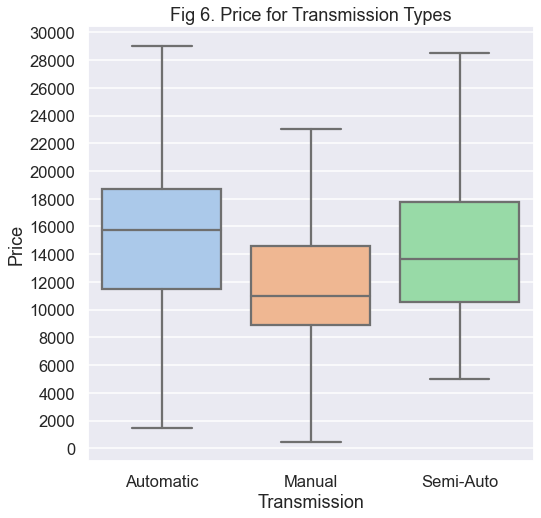

In [16]:
plt.figure(figsize=(8,8))

# creating boxplot using seaborn
sns.boxplot(x=df['transmission'], y=df['price'], showfliers=False)
# showfliers=False is used to exclude outliers

plt.yticks(np.arange(0, 30001, 2000))
plt.ylabel('Price')
plt.xlabel('Transmission')
plt.title('Fig 6. Price for Transmission Types')
plt.show()

Fig 6. shows the price of semi automatic cars although is the highest at the lowest observation, the price of automatic cars is more at highest observation. Even according to median value the price of automatic cars is observed to be higher at approximately \\$16,000. So, it can be said that the price of automatic cars varies significantly with 50% of the observations between approximately \\$11,000 and \\$19,000.

### Finding and Visualizing Data for Price based on Car Models, Types of Transmission and Fuel

In [17]:
# defining a function barplot_(col) that inputs the column names
def barplot_(col):
    
    # grouping/pivoting the main column based on the price column
    # and aggregate 'count' = frequency of each unique values of the main column, 
    # and aggregate 'mean' = average price of each unique values of the main column,
    # and aggregate 'sum' = total price of each unique values of the main column
    # rounding the agg columns to two places after decimal
    data = df.groupby(col)[['price']].agg(['count','mean','sum']).round(2)
    
    # Sorting the new dataset by descending frequency of observations
    data = data.sort_values(by=('price','count'), ascending= False)
    
    # Changing the 'sum' in term of millions
    data[('price', 'sum')] = (data[('price', 'sum')]/1000000).round(2)
    
    #data[('price', 'count')] = data[('price', 'count')]/100
    
    # Changing the 'count' from frequency to percentage
    data[('price', 'count')] = (data[('price', 'count')]/data[('price', 'count')].sum())*100
    
    # display(data)
    
    # Creating the barplots
    plt.figure(figsize=(20,8))
    
    #Count
    plt.subplot(1,3,1)
    sns.barplot(y=data.index, x=('price', 'count'), data=data, orient='h', color = 'blue')
    plt.title("Percentage of Cars")
    plt.ylabel(col)
    plt.xlabel("Percentage of cars (%)")
    
    #mean
    plt.subplot(1,3,2)
    sns.barplot(y=data.index, x=('price', 'mean'), data=data, orient='h', color='green')
    plt.title("Average Resale Price of Cars")
    plt.ylabel("")
    plt.xlabel("Average Price ($)")
    
    #sum
    plt.subplot(1,3,3)
    sns.barplot(y=data.index, x=('price', 'sum'), data=data, orient='h', color='orange')
    plt.title("Total Resale Price of Cars")
    plt.ylabel("")
    plt.xlabel("Total Price in millions ($)")
    
    plt.suptitle("Fig. Barplots of the Ford Used Cars based on " + str(col))
    plt.tight_layout()
    plt.show()

### Barplots based on Model
Objective:
1. Top 5 selling car models in the dataset
2. Top 5 car models according to average selling price 
3. Top 5 car models according to total selling price

In [18]:
print(df['model'].unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']


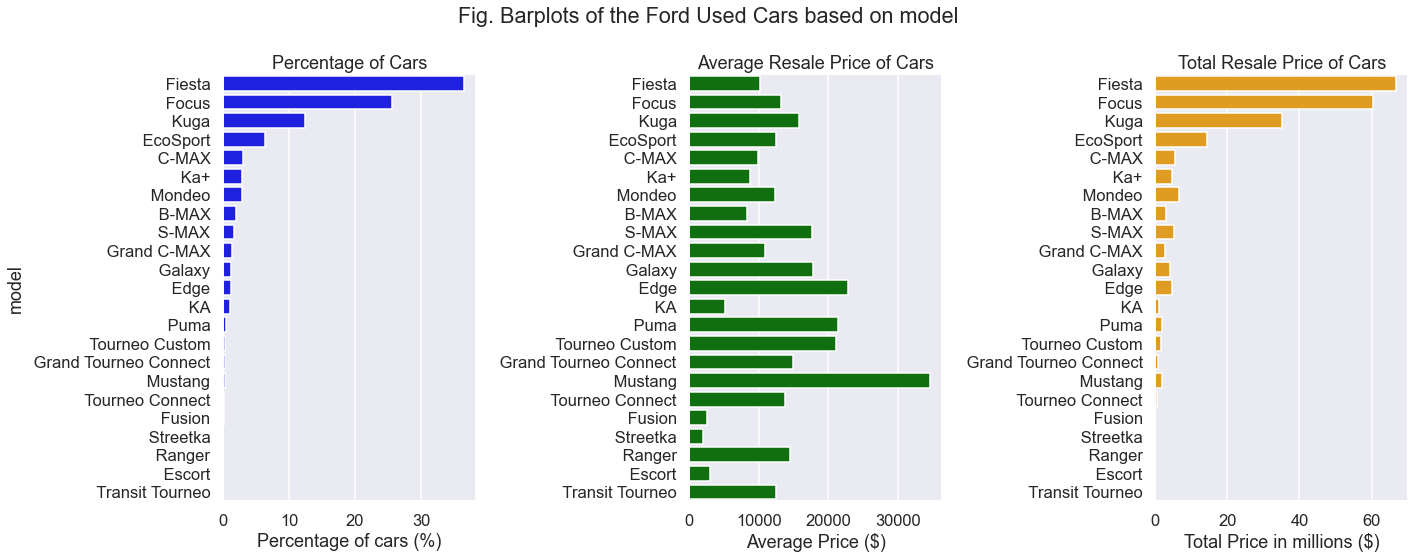

In [19]:
barplot_('model')

- The top 5 car models resold based on the dataset are **Fiesta** (36.5%), **Focus** (25.5%), **Kuga** (12%), **EcoSport** (6%) and **C-Max** (3%).
- The top 5 car models based on average resale value are **Mustang** (\\$34,631),  **Edge** (\\$22,810), **Puma** (\\$21,447), **Tourneo Custom** (\\$21,166) and **Galaxy** (\\$17,841). 
- The top 5 car models based on total resale value are **Fiesta** (\\$66M), **Focus** (\\$60M), **Kuga** (\\$35M), **EcoSport** (\\$14M) and **Mondeo** (\\$6M).

### Barplots based on Transmission 
Objective: 
1. Highest selling type of transmission in the dataset
2. Highest selling type of transmission according to average selling price 
3. Highest selling type of transmission according to total selling price

In [20]:
print(df['transmission'].unique())

['Automatic' 'Manual' 'Semi-Auto']


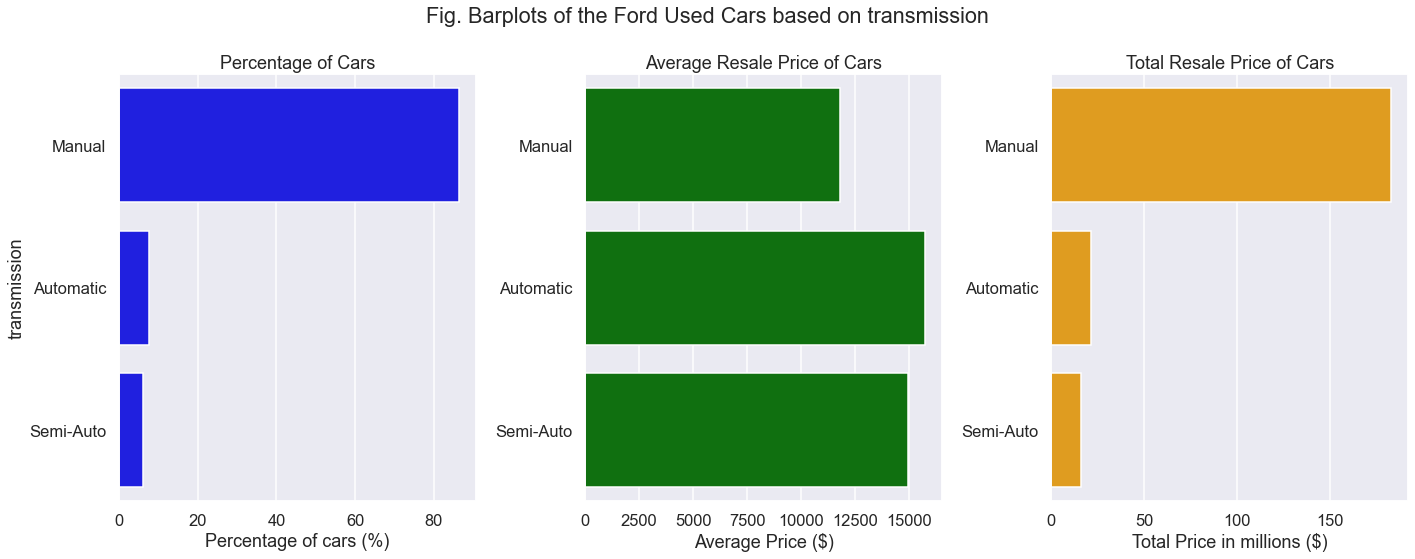

In [21]:
barplot_("transmission")

- The highest selling transmission type is Manual (86%).
- Based on average price, highest selling transmission type is **Automatic** (\\$15,734), followed by **Semi-Auto** (\\$14,919).
- Based on the total resale price, **Manual** cars has the highest value at \\$183 million, while the other two transmission types has less than \\$38 millions together.

### Barplots based on FuelType 
Objective:
1. Highest selling fuel-type in the dataset
2. Highest selling fuel-type according to average selling price 
3. Highest selling fuel-type according to total selling price

In [22]:
print(df['fuelType'].unique())

['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


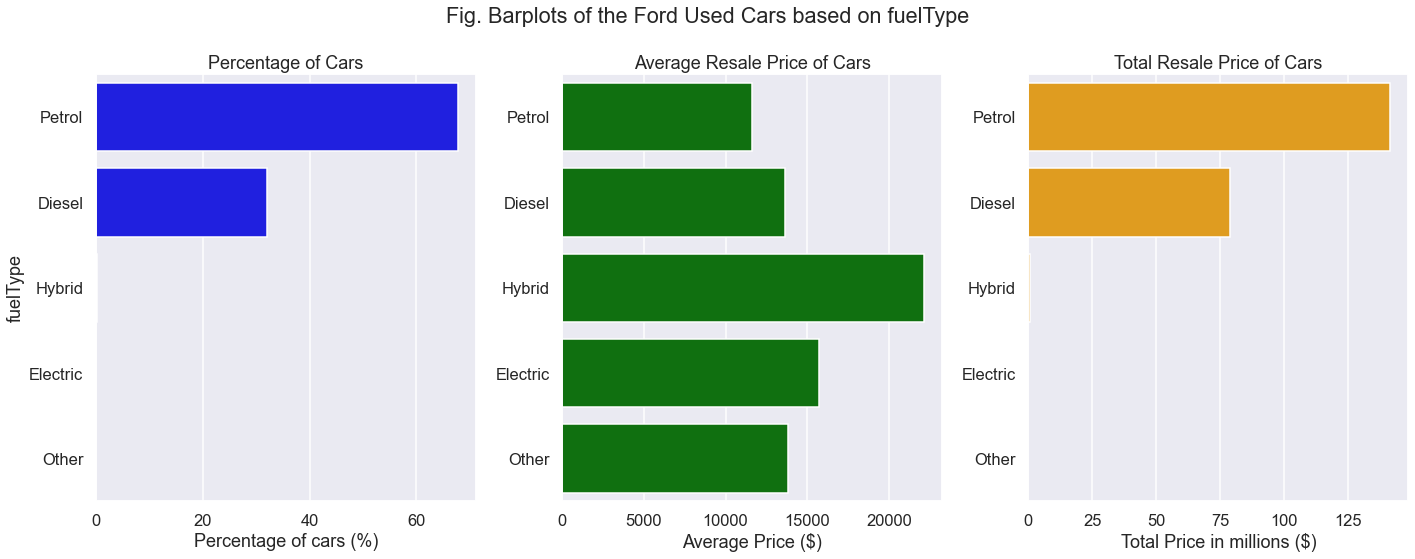

In [23]:
barplot_('fuelType')

- The highest selling fuel-type is **Petrol** (67.8%).
- Based on average price, highest selling fuel-type is **Hybrid** (\\$22,150), followed by **Electric** (\\$15,737) and **Diesel** (\\$13,659).
- Based on the total resale price, highest selling fuel-type is **Petrol** (\\$141M).